## Imports

In [64]:
#all the necessary imports to run the file
from numba.decorators import jit as optional_jit
!{sys.executable} -m pip install sounddevice
!{sys.executable} -m pip install librosa
!{sys.executable} -m pip install numba==0.48.0

import os
import sounddevice as sd
from scipy.io.wavfile import write
import librosa
import time
import shutil
import numpy as np
import matplotlib.pyplot as plt

/bin/sh: {sys.executable}: command not found
/bin/sh: {sys.executable}: command not found


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  


/bin/sh: {sys.executable}: command not found


In [7]:
from pathlib import Path

y = list()

tone_data_path = Path('.gitignore/tone_perfect_mp3')
files_in_tone_data_path = tone_data_path.iterdir()

for item in files_in_tone_data_path:
    if item.is_file():
        filename = item.name.split("_") #"{}{}_{}V{}_MP3.mp3".format(word, tone, gender, personID)
        y.append(int(filename[0][-1])) 
        
        #transform all of the data to mfccs (Mel Frequency Cepstral Coefficients)
        #https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd
        audio, sampling_rate = librosa.load(item)
        mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate) #n_mfcc=60
        
#         pad_width = max_pad - mfcc.shape[1]
#         mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        break
    break

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [13]:
# Possibly need to split the data into M vs F users
# in this case, we would have to split the data into male or female and
# train 2 different models and predict on both those models and find the 
# the closest one OR have the person
#
# for sex in ["MV", "FV"]:
#     for label in range(1,5):
#         try:
#             directory_name = ".gitignore/{}{}".format(sex,label)
#             os.makedirs(directory_name)    
#             print("Directory " , directory_name ,  " Created ")
#         except FileExistsError:
#             print("Directory " , directory_name ,  " already exists") 

# User Interface

## Create folder to hold user audio
<p> Run the following cell to remove previous user audio and make the folder to hold all user input audio. <p>

In [70]:
#initializing folder to hold user audio
user_audio_directory = ("user_audio")
try:
    shutil.rmtree(user_audio_directory)
    os.makedirs(user_audio_directory)
    print("Removed data and recreated folder", user_audio_directory)
except(FileNotFoundError):
    os.makedirs(user_audio_directory)
    print("Created folder {}".format(user_audio_directory)) 

Created folder user_audio


## Record user's voice

<pr> Following cell records a user's voice. Users are encouraged to only record monosyllabic words in order to practice tonalities. An unclear recording will result in a low<pr>

In [71]:
frame_rate = 44100
duration = 1.5 #seconds

recording_num = len(os.listdir('user_audio/')) + 1
recording_name = 'user_audio/sample_audio_{}.mp3'.format(recording_num)

print("Recording in...")
pause = 3

while pause > 0:
    print("{}".format(pause))
    pause -= 1
    time.sleep(1)
print("RECORDING")

recording = sd.rec(int(duration * frame_rate), samplerate = frame_rate, channels = 1)
sd.wait()
write(recording_name, frame_rate, recording)

print("Finished")

Recording in...
3
2
1
RECORDING
Finished


## Play back and plot the user recording 
<pr> User can play back and see a visualization of their latest recording as many times as they like. <pr>

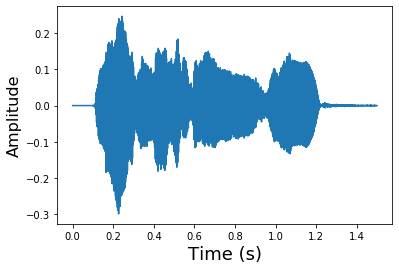

In [76]:
try: 
    audio, sampling_rate = librosa.load(recording_name)
    
    #plot
    timeline = np.arange(0, len(audio))/sampling_rate
    fig = plt.figure()
    plt.plot(timeline, audio)
    plt.xlabel("Time (s)", fontsize=18)
    plt.ylabel("Amplitude", fontsize=16)
               
    #play back
    sd.play(audio, sampling_rate)
    sd.wait()
    sd.stop()
except(FileNotFoundError):
    print("Please go back and run the previous two cells")


## Delete all user recordings

In [77]:
try:
    shutil.rmtree(user_audio_directory)
    print("Successfully removed user data")
except(FileNotFoundError):
    print("User data already deleted".format(user_audio_directory)) 

Successfully removed user data


# Classify user recording